<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('payment_fraud.csv')

In [ ]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


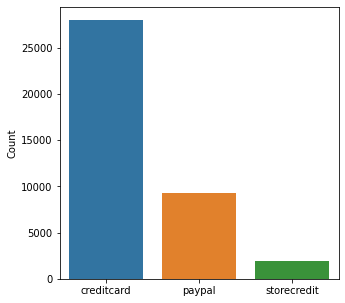

In [ ]:
paymthd = df.paymentMethod.value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(paymthd.index, paymthd);
plt.ylabel('Count');

In [ ]:
df.label.value_counts()

0    38661
1      560
Name: label, dtype: int64

In [ ]:
paymthd_label = {v:k for k, v in enumerate(df.paymentMethod.unique())}

df.paymentMethod = df.paymentMethod.map(paymthd_label)

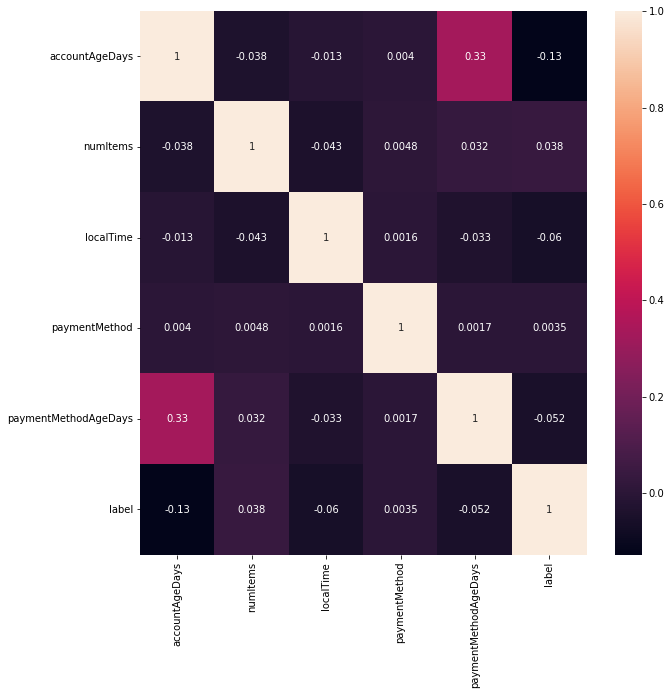

In [ ]:
## corr(): it gives the correlation between the featuers
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

### Cross Validation: KFold and Hyperparameter Technique: GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
log_class = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3), 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[9661    3]
 [ 131   11]]
0.9863348970018356
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9664
           1       0.79      0.08      0.14       142

    accuracy                           0.99      9806
   macro avg       0.89      0.54      0.57      9806
weighted avg       0.98      0.99      0.98      9806



In [ ]:
class_weight = dict({0: 1, 1: 100})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight=class_weight)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [ ]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[9664    0]
 [   0  142]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9664
           1       1.00      1.00      1.00       142

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806



###Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 28997, 1: 418})
The number of classes after fit Counter({0: 522, 1: 418})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 28997, 1: 418})
The number of classes after fit Counter({0: 522, 1: 418})


In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression()
clf.fit(X_train_ns, y_train_ns)

LogisticRegression()

In [ ]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[8655 1009]
 [  97   45]]
0.8872119110748521
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      9664
           1       0.04      0.32      0.08       142

    accuracy                           0.89      9806
   macro avg       0.52      0.61      0.51      9806
weighted avg       0.98      0.89      0.93      9806



###Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler(0.5)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 28997, 1: 418})
The number of classes after fit Counter({0: 28997, 1: 14498})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression()
clf.fit(X_train_os, y_train_os)

LogisticRegression()

In [ ]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[8456 1208]
 [   0  142]]
0.8768101162553539
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      9664
           1       0.11      1.00      0.19       142

    accuracy                           0.88      9806
   macro avg       0.55      0.94      0.56      9806
weighted avg       0.99      0.88      0.92      9806



In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
os = SMOTETomek(0.5)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 28997, 1: 418})
The number of classes after fit Counter({0: 28982, 1: 14483})


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel
clf.fit(X_train_os, y_train_os)

In [ ]:
prediction = clf.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))